In [1]:
import numpy as np
import pandas as pd
import tensorflow_hub as hub

# Load dataset
df = pd.read_csv("preprocessed_emoji_dataset.csv")
tweets = df['tweet'].astype(str).tolist()

# Load Universal Sentence Encoder model
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Function to generate embeddings in batches
def generate_embeddings(tweets, batch_size=32):
    embeddings_list = []
    for i in range(0, len(tweets), batch_size):
        batch = tweets[i:i + batch_size]
        embeddings = embed(batch).numpy()
        embeddings_list.append(embeddings)
    return np.vstack(embeddings_list)  # Stack all the embeddings into a single array

# Generate embeddings for tweets
embeddings = generate_embeddings(tweets)

# Save embeddings to a file
np.save("embeddings_use-3.npy", embeddings)

print("Embeddings saved successfully.")


2024-10-09 21:28:06.124386: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-10-09 21:28:06.124426: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-10-09 21:28:06.124434: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-10-09 21:28:06.124455: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-09 21:28:06.124469: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-10-09 21:28:09.603245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Embeddings saved successfully.


Training Logistic Regression...
Fold 1 - Train Accuracy: 0.7039, Test Accuracy: 0.6913
Fold 2 - Train Accuracy: 0.7021, Test Accuracy: 0.6908
Fold 3 - Train Accuracy: 0.7021, Test Accuracy: 0.6996
Fold 4 - Train Accuracy: 0.7029, Test Accuracy: 0.6978
Fold 5 - Train Accuracy: 0.7025, Test Accuracy: 0.7016
Average Test Accuracy for Logistic Regression: 0.6962
Average Test F1-Score for Logistic Regression: 0.6962
Average Test Precision for Logistic Regression: 0.6964
Average Test Recall for Logistic Regression: 0.6962



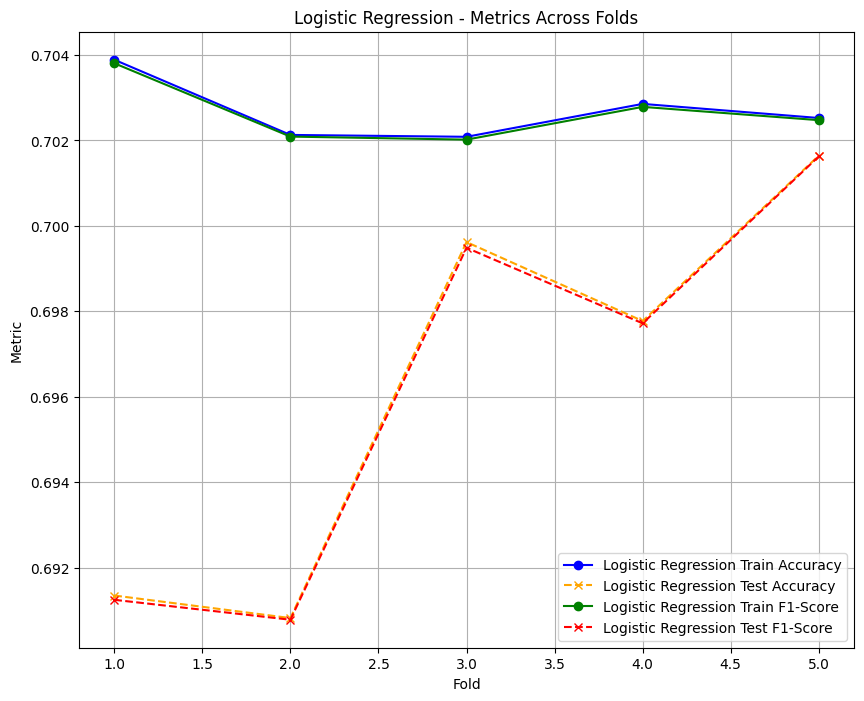

Training SVM...
Fold 1 - Train Accuracy: 0.8875, Test Accuracy: 0.8151
Fold 2 - Train Accuracy: 0.8858, Test Accuracy: 0.8219
Fold 3 - Train Accuracy: 0.8845, Test Accuracy: 0.8233
Fold 4 - Train Accuracy: 0.8856, Test Accuracy: 0.8179
Fold 5 - Train Accuracy: 0.8854, Test Accuracy: 0.8186
Average Test Accuracy for SVM: 0.8194
Average Test F1-Score for SVM: 0.8194
Average Test Precision for SVM: 0.8194
Average Test Recall for SVM: 0.8194



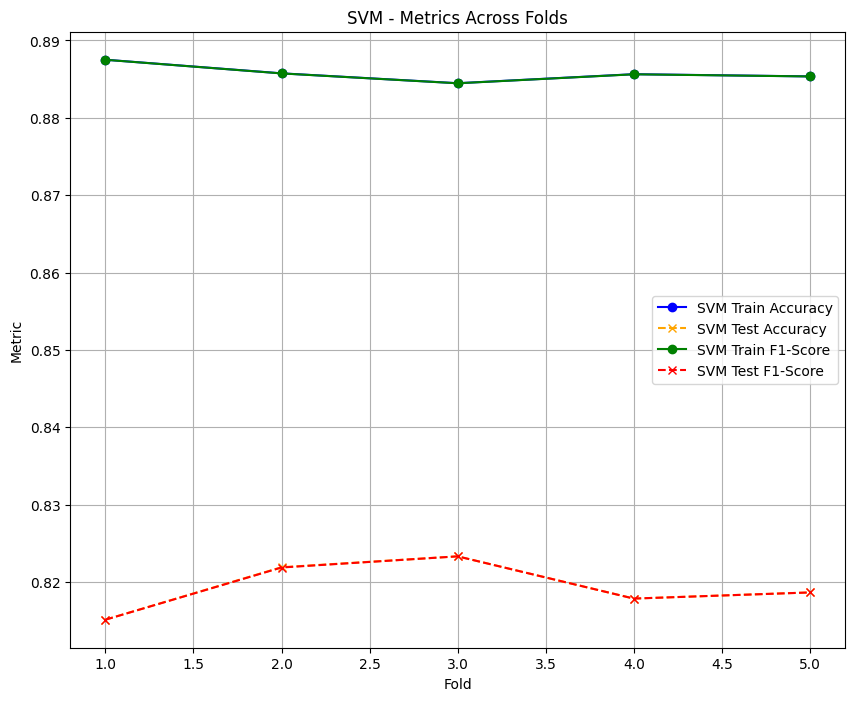

Training Random Forest...
Fold 1 - Train Accuracy: 0.9939, Test Accuracy: 0.8060
Fold 2 - Train Accuracy: 0.9936, Test Accuracy: 0.8143
Fold 3 - Train Accuracy: 0.9936, Test Accuracy: 0.8182
Fold 4 - Train Accuracy: 0.9938, Test Accuracy: 0.8049
Fold 5 - Train Accuracy: 0.9936, Test Accuracy: 0.8157
Average Test Accuracy for Random Forest: 0.8118
Average Test F1-Score for Random Forest: 0.8118
Average Test Precision for Random Forest: 0.8118
Average Test Recall for Random Forest: 0.8118



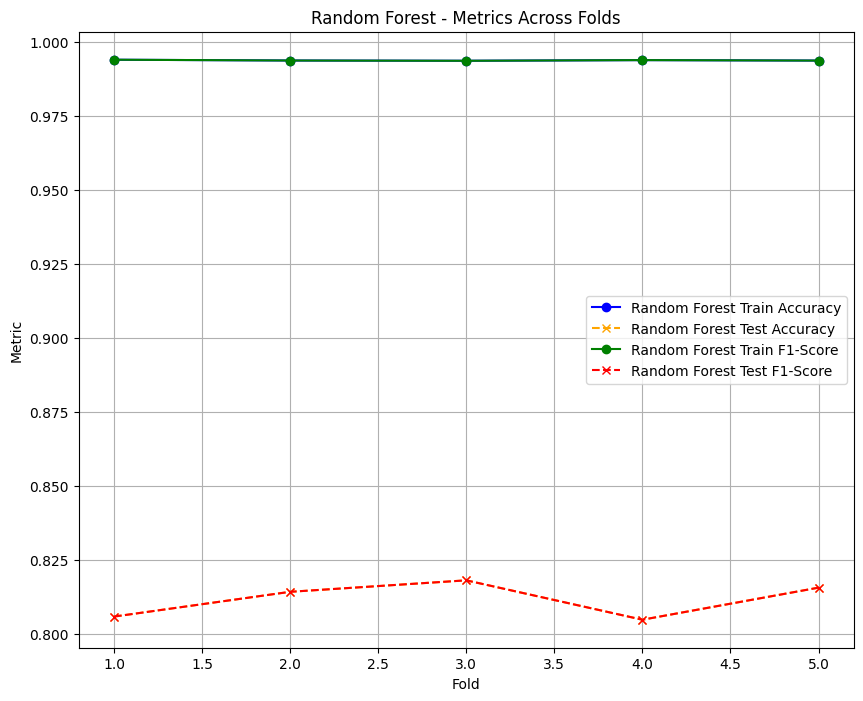

Training k-NN...
Fold 1 - Train Accuracy: 0.8582, Test Accuracy: 0.7806
Fold 2 - Train Accuracy: 0.8588, Test Accuracy: 0.7850
Fold 3 - Train Accuracy: 0.8564, Test Accuracy: 0.7816
Fold 4 - Train Accuracy: 0.8572, Test Accuracy: 0.7862
Fold 5 - Train Accuracy: 0.8577, Test Accuracy: 0.7830
Average Test Accuracy for k-NN: 0.7833
Average Test F1-Score for k-NN: 0.7832
Average Test Precision for k-NN: 0.7834
Average Test Recall for k-NN: 0.7833



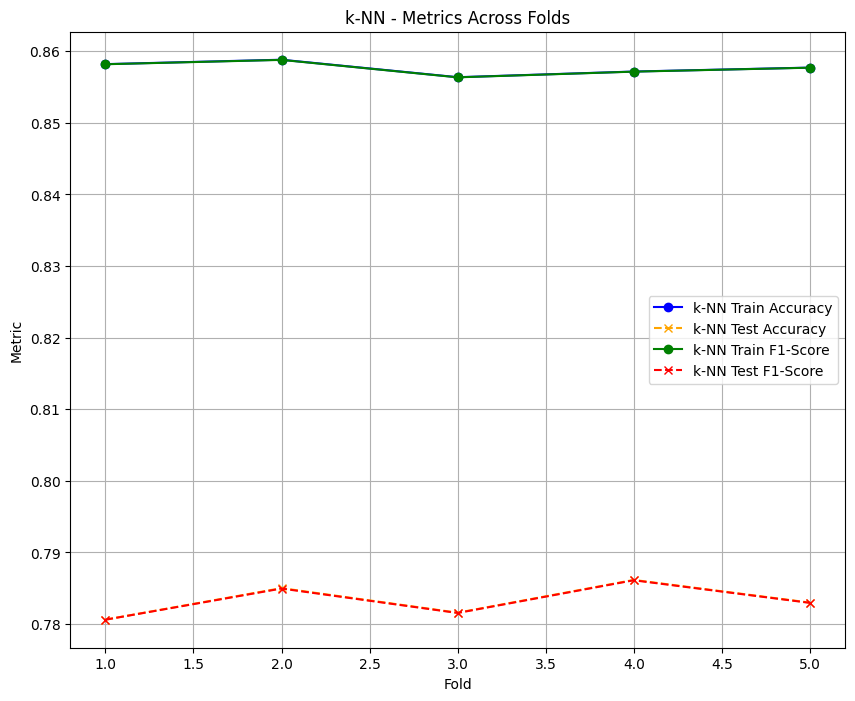

Training Decision Tree...
Fold 1 - Train Accuracy: 0.9939, Test Accuracy: 0.7484
Fold 2 - Train Accuracy: 0.9936, Test Accuracy: 0.7505
Fold 3 - Train Accuracy: 0.9936, Test Accuracy: 0.7569
Fold 4 - Train Accuracy: 0.9938, Test Accuracy: 0.7517
Fold 5 - Train Accuracy: 0.9936, Test Accuracy: 0.7550
Average Test Accuracy for Decision Tree: 0.7525
Average Test F1-Score for Decision Tree: 0.7525
Average Test Precision for Decision Tree: 0.7525
Average Test Recall for Decision Tree: 0.7525



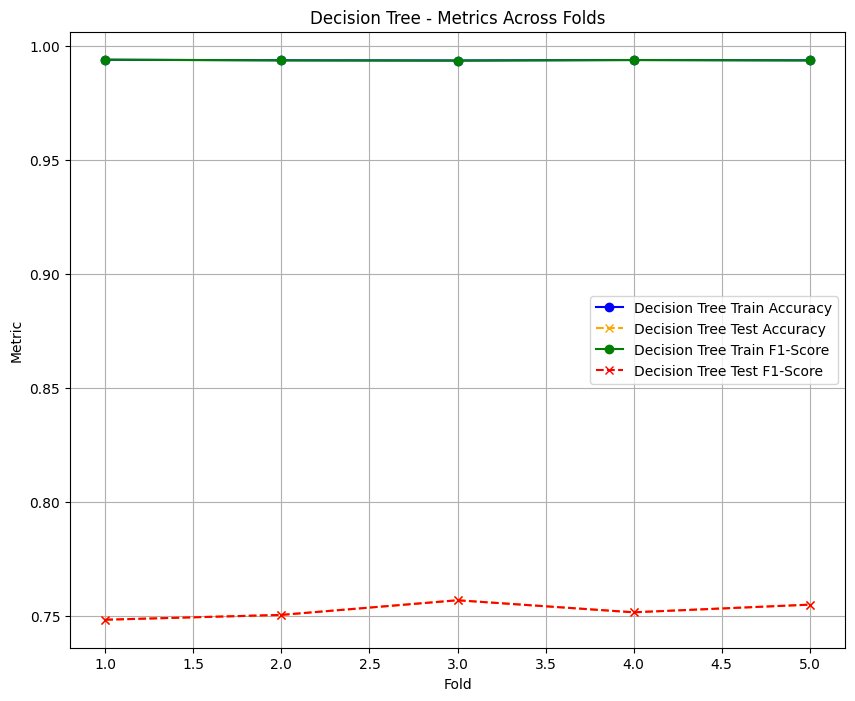

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier  
import matplotlib.pyplot as plt

# Load saved embeddings
embeddings = np.load("embeddings_use-3.npy")

# Load labels from the original dataset
df = pd.read_csv("preprocessed_emoji_dataset.csv")
labels = df['label'].values

# KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'k-NN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()  
}

# Initialize dictionaries to store metrics for each model
metrics = ['accuracy', 'f1_score', 'precision', 'recall']
all_train_metrics = {name: {metric: [] for metric in metrics} for name in classifiers.keys()}
all_test_metrics = {name: {metric: [] for metric in metrics} for name in classifiers.keys()}

for name, model in classifiers.items():
    print(f"Training {name}...")
    
    fold_num = 1
    for train_index, test_index in kf.split(embeddings):
        X_train, X_test = embeddings[train_index], embeddings[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        # Train the model
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate metrics for train set
        train_acc = accuracy_score(y_train, y_train_pred)
        train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        train_precision = precision_score(y_train, y_train_pred, average='weighted')
        train_recall = recall_score(y_train, y_train_pred, average='weighted')

        # Calculate metrics for test set
        test_acc = accuracy_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')
        test_precision = precision_score(y_test, y_test_pred, average='weighted')
        test_recall = recall_score(y_test, y_test_pred, average='weighted')

        # Store metrics
        all_train_metrics[name]['accuracy'].append(train_acc)
        all_train_metrics[name]['f1_score'].append(train_f1)
        all_train_metrics[name]['precision'].append(train_precision)
        all_train_metrics[name]['recall'].append(train_recall)

        all_test_metrics[name]['accuracy'].append(test_acc)
        all_test_metrics[name]['f1_score'].append(test_f1)
        all_test_metrics[name]['precision'].append(test_precision)
        all_test_metrics[name]['recall'].append(test_recall)

        print(f"Fold {fold_num} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
        fold_num += 1
    
    # Average metrics across all folds for each model
    avg_test_accuracy = np.mean(all_test_metrics[name]['accuracy'])
    avg_test_f1 = np.mean(all_test_metrics[name]['f1_score'])
    avg_test_precision = np.mean(all_test_metrics[name]['precision'])
    avg_test_recall = np.mean(all_test_metrics[name]['recall'])

    print(f"Average Test Accuracy for {name}: {avg_test_accuracy:.4f}")
    print(f"Average Test F1-Score for {name}: {avg_test_f1:.4f}")
    print(f"Average Test Precision for {name}: {avg_test_precision:.4f}")
    print(f"Average Test Recall for {name}: {avg_test_recall:.4f}\n")

    # Plot the results
    plt.figure(figsize=(10, 8))
    plt.plot(range(1, 6), all_train_metrics[name]['accuracy'], marker='o', label=f'{name} Train Accuracy', color='blue')
    plt.plot(range(1, 6), all_test_metrics[name]['accuracy'], marker='x', linestyle='--', label=f'{name} Test Accuracy', color='orange')
    plt.plot(range(1, 6), all_train_metrics[name]['f1_score'], marker='o', label=f'{name} Train F1-Score', color='green')
    plt.plot(range(1, 6), all_test_metrics[name]['f1_score'], marker='x', linestyle='--', label=f'{name} Test F1-Score', color='red')
    plt.xlabel('Fold')
    plt.ylabel('Metric')
    plt.title(f'{name} - Metrics Across Folds')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()